# ASSIGNMENT

*House Price Data*

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')

1 - Investigate the data and do any necessary data cleaning.

In [2]:
house = pd.read_csv("data/houseprices.csv")
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
x = house.isnull().sum() * 100 / house.shape[0]
x[x.iloc[:]>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

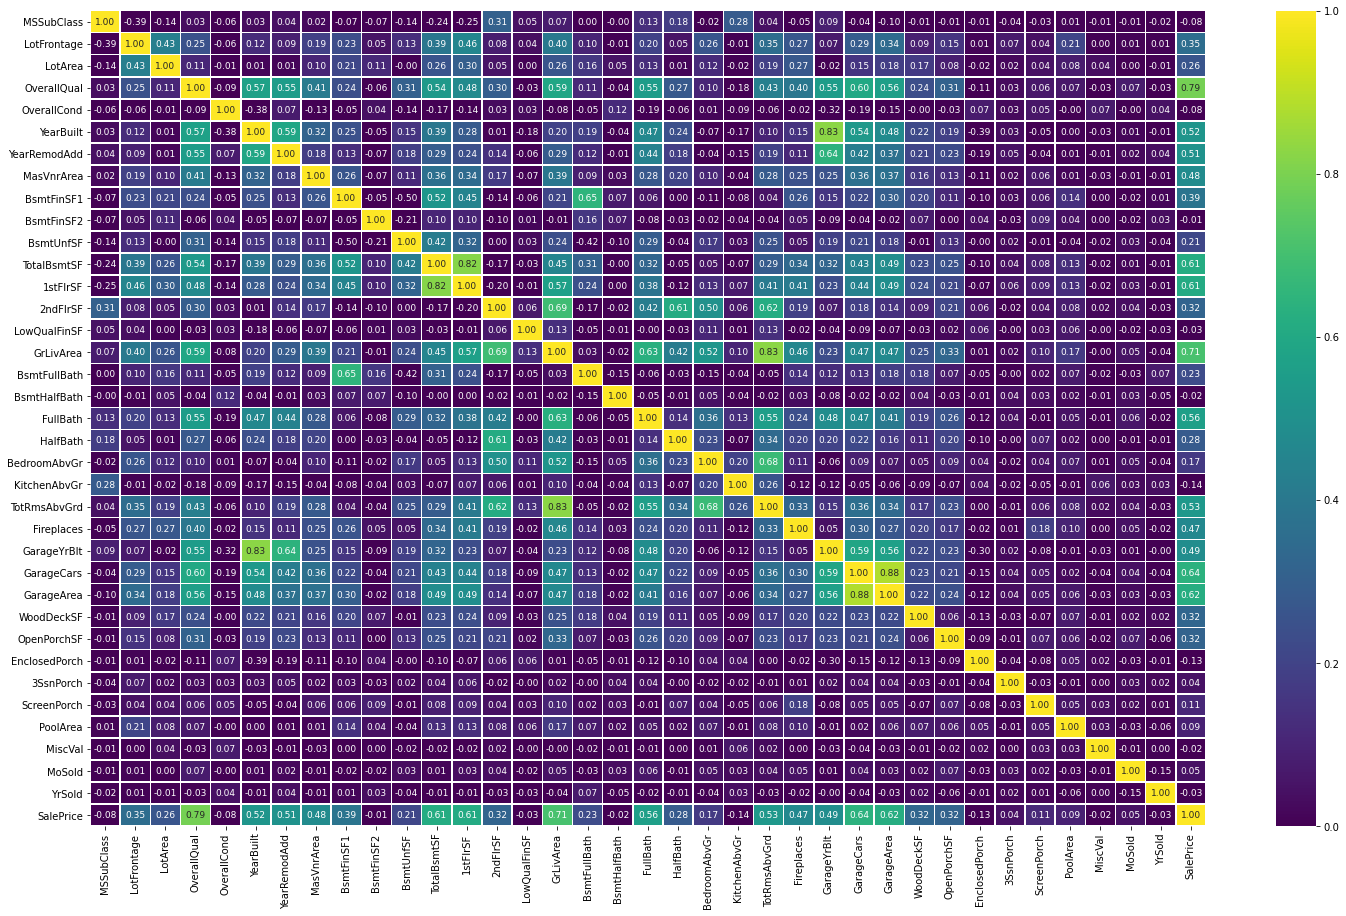

In [4]:
house_corr = house.corr()
plt.figure(figsize = (25,15))
sns.heatmap(house_corr, fmt = '.2f', annot_kws = {'size':9}, cmap= 'viridis',linewidth = .5, annot = True, vmin=0, vmax=1)

In [5]:
# NaN values are means there is no alley access so I will change the nan values to no_alley_access 

In [6]:
house.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [7]:
msg = "no_alley_access"
house.Alley.fillna(msg, inplace=True)

In [8]:
#LotFrontage

house.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [9]:
house.LotFrontage.fillna(house.LotFrontage.mean(), inplace = True)

In [10]:
#MasVnrType
#I will fill na's with 'None'
house.MasVnrType.unique()
house.MasVnrType.fillna("None", inplace=True)

In [11]:
#MasVnrArea
#I will fill na's with mean because there is a few na values.

house.MasVnrArea.fillna(house.MasVnrArea.dropna().mean(), inplace = True)

In [12]:
#BsmtQual

# Nan values are means "there is no basement in this house" so I will fill NaN values with "no_basement"

house.BsmtQual.fillna("no_basement", inplace = True)

In [13]:
#BsmtCond ,#BsmtFinType1, #BsmtFinType2, #BsmtExposure
# In all these columns, Nan values are means "No basement" so I will fill NaN values with "no_basement"

house.BsmtCond.fillna("no_basement", inplace = True)
house.BsmtFinType1.fillna("no_basement", inplace = True)
house.BsmtFinType2.fillna("no_basement", inplace = True)
house.BsmtExposure.fillna("no_basement", inplace = True)

In [14]:
#Electrical
house.groupby(house.Electrical).count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Electrical,,,,,,,,,,,,,,,,,,,,,
FuseA,94,94,94,94,94,94,94,94,94,94,...,94,0,23,2,94,94,94,94,94,94
FuseF,27,27,27,27,27,27,27,27,27,27,...,27,0,2,0,27,27,27,27,27,27
FuseP,3,3,3,3,3,3,3,3,3,3,...,3,0,0,0,3,3,3,3,3,3
Mix,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
SBrkr,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,...,1334,7,256,52,1334,1334,1334,1334,1334,1334


In [15]:
# Sbrkr is major type of Electrical Systems so I will fill the nan values with Sbrkr
house.Electrical.fillna("Sbrkr", inplace = True)

In [16]:
# FireplaceQu 
# Nan values are means there is no FirePlace so I will fill nan values with "no_fireplace"

house.FireplaceQu.fillna("no_fireplace", inplace = True)

In [17]:
x = house.isnull().sum() * 100 / house.shape[0]
x[x.iloc[:]>0]

GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [18]:
#GarageType , GarageYrBlt , GarageFinish, GarageQual , GarageCond

# For all these columns Nan Values is means No Garage 

house.GarageType.fillna("no_garage", inplace = True)
house.GarageYrBlt.fillna("no_garage", inplace = True)
house.GarageFinish.fillna("no_garage", inplace = True)
house.GarageQual.fillna("no_garage", inplace = True)
house.GarageCond.fillna("no_garage", inplace = True)


In [19]:
#PoolQC
# Nan values means there is no_pool

house.PoolQC.fillna("no_pool", inplace = True)

In [20]:
#Fence
#Nan values means there is no_fence

house.Fence.fillna("no_fence", inplace = True)

In [21]:
#MiscFeature

house.MiscFeature.fillna("no_bonus", inplace = True)

In [22]:
s = house.select_dtypes(exclude = "object").columns
s

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [23]:
#Z-Score (Standardization)

from scipy.stats import zscore
def do_wins(df,number1,number2):
    z = zscore(df)
    for threshold in range(1,5):
        print("Threshold value {}".format(threshold))
        print("Number of Outliers: {}".format(len(np.where(z > threshold)[0])))
    
    wins_df = winsorize(df, (number1,number2))
    
    z1 = zscore(wins_df)
    print("\nWinsorized zscore threshold ----------- BEGINS")
    for threshold in [1.5,2.5,3.5,4.5]:
        print("Threshold value {}".format(threshold))
        print("Number of Outliers: {}".format(len(np.where((z1 > threshold)|(z1 < -threshold))[0])))
    plt.boxplot(z1)
    plt.title("Winsorized z-score boxplot")
    plt.show()
    return wins_df

2- Explore the data and find some variables that you think would be useful in the prediction of the house prices.

  **1- OverallQual - correlation is very high
    2- **

In [100]:
def barpl(col):
    df = pd.DataFrame(house.groupby(house[col]).SalePrice.mean())
    df = df.reset_index()
    plt.figure(figsize=(20,6))
    sns.barplot(data = df, x = df[col], y = df.SalePrice, palette = "viridis")

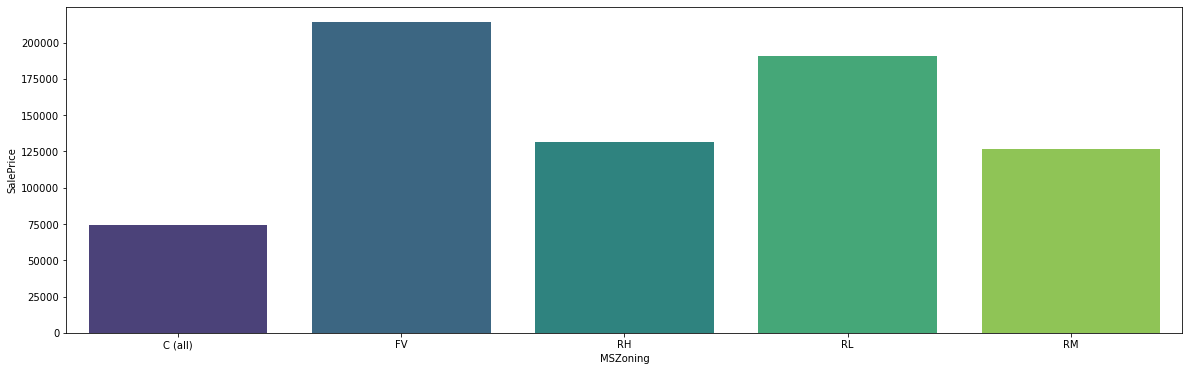

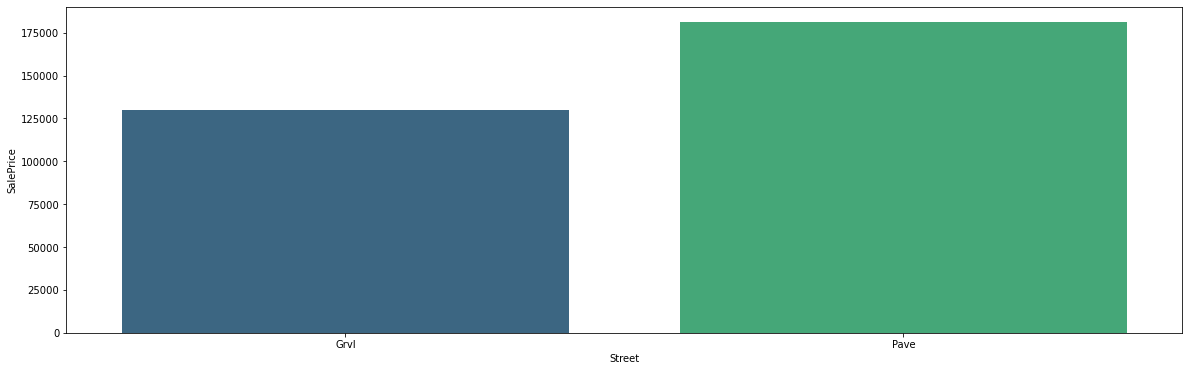

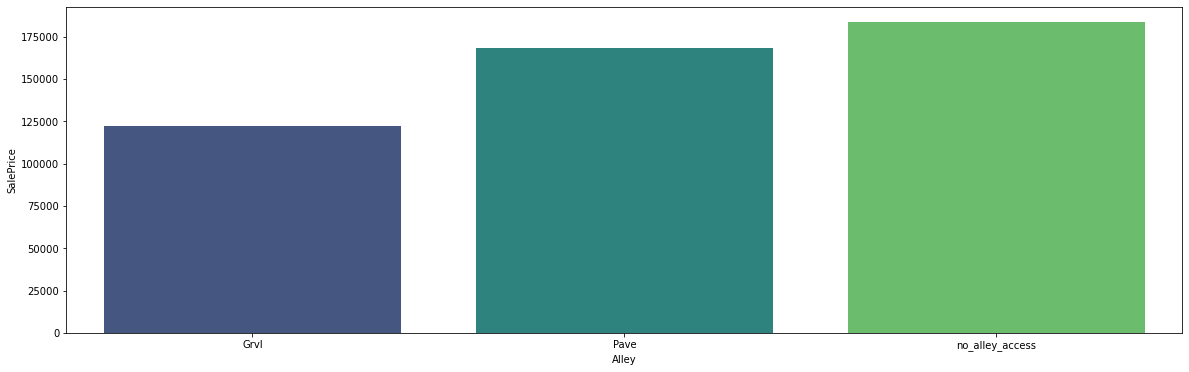

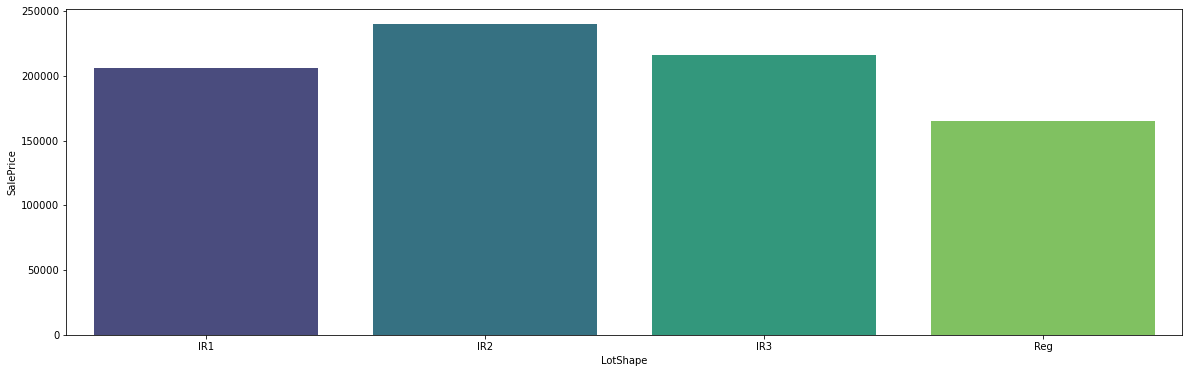

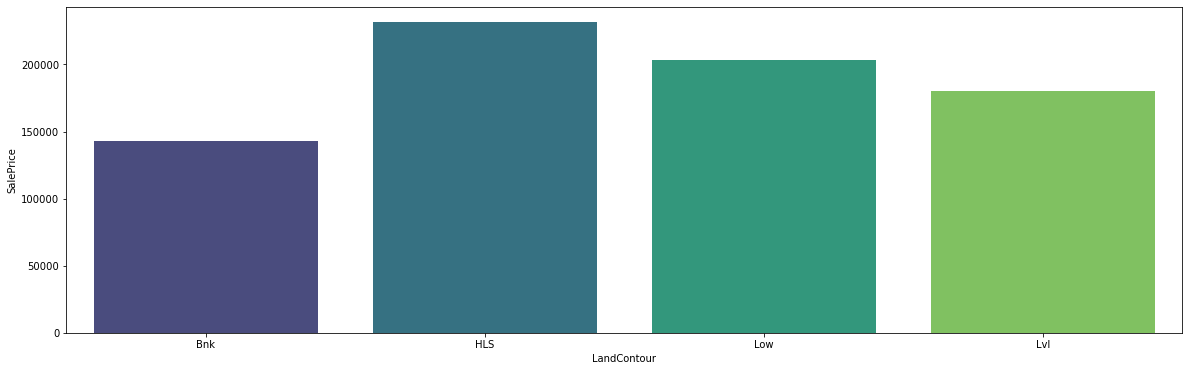

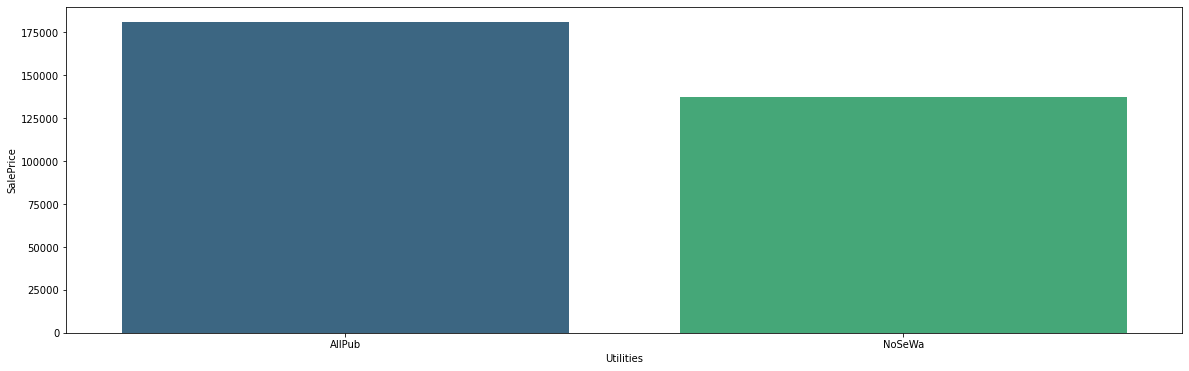

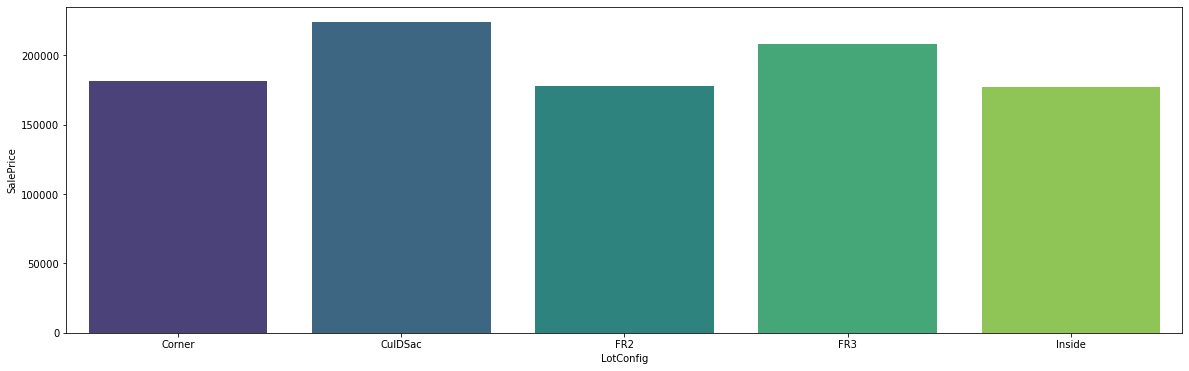

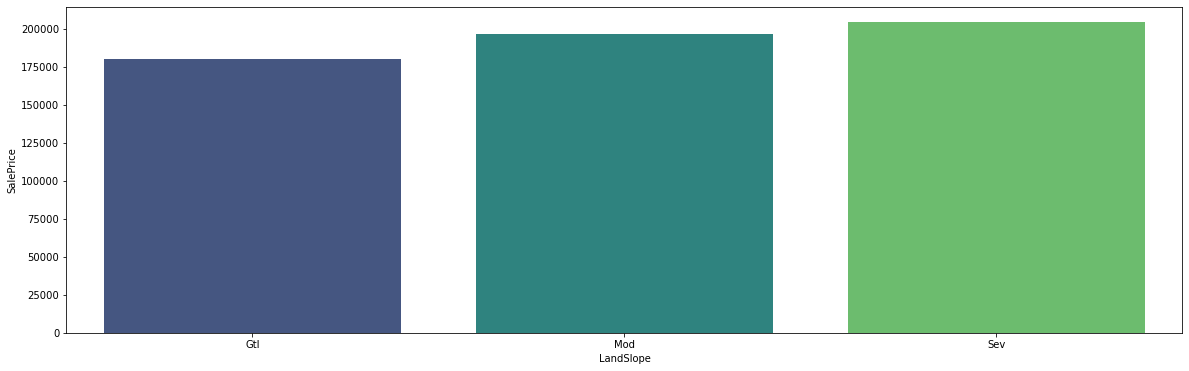

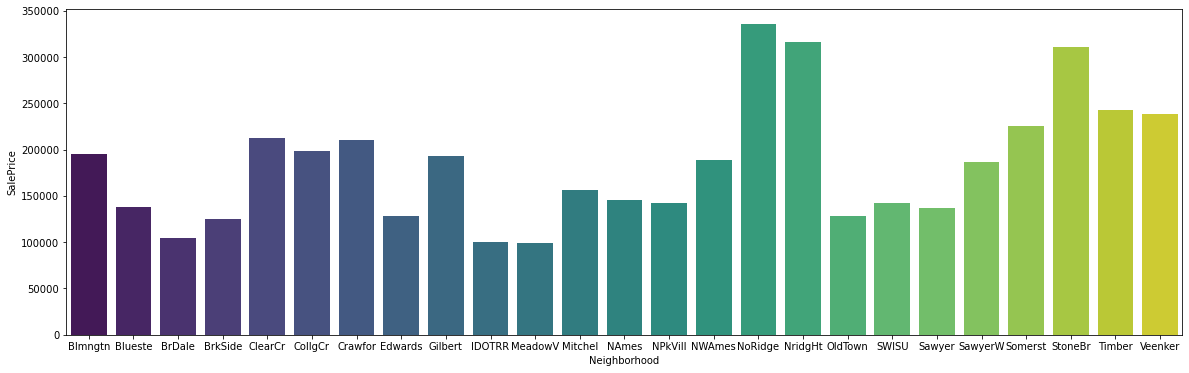

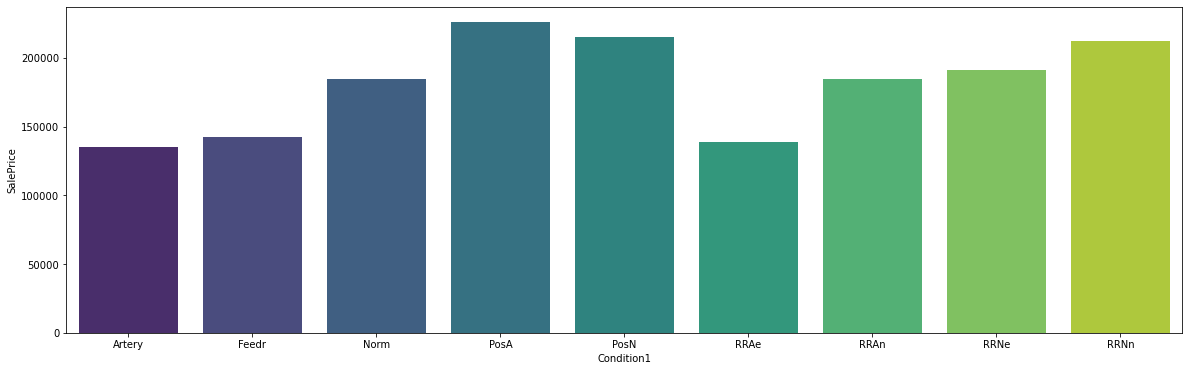

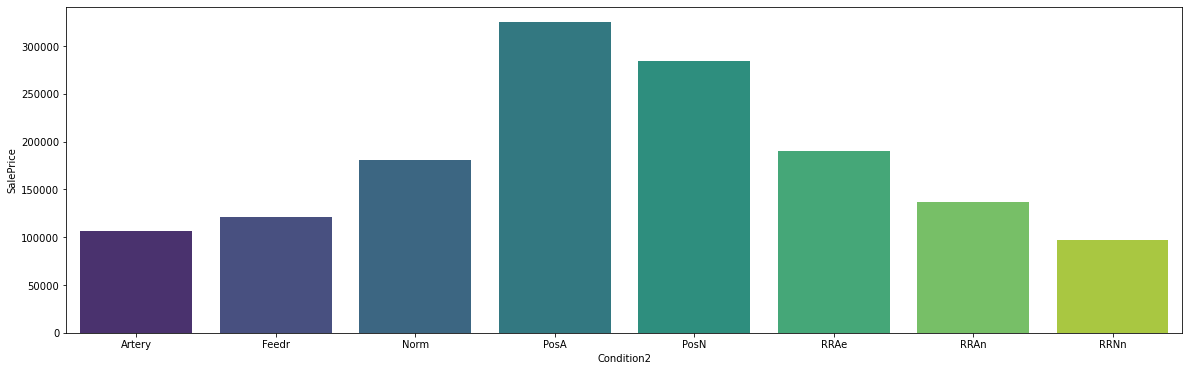

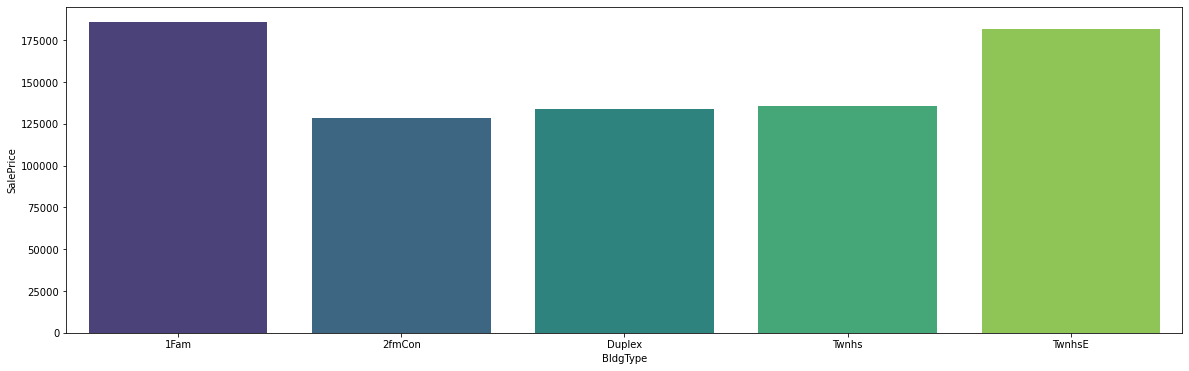

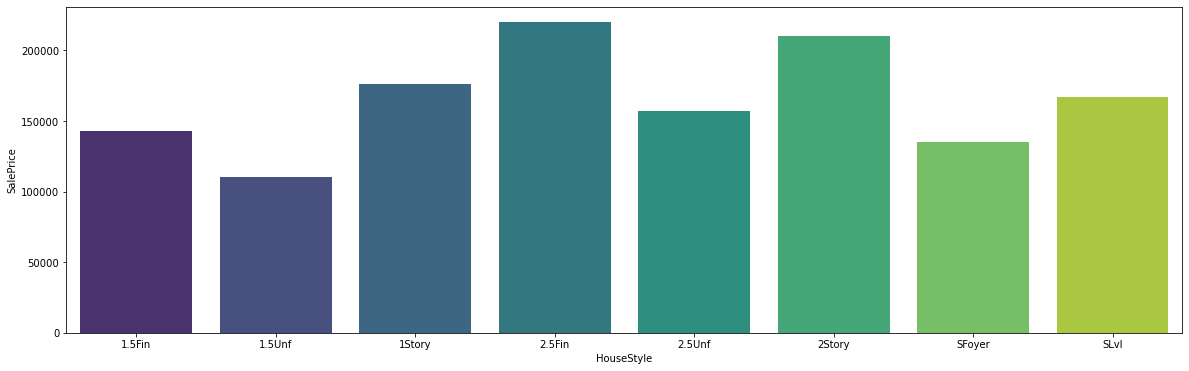

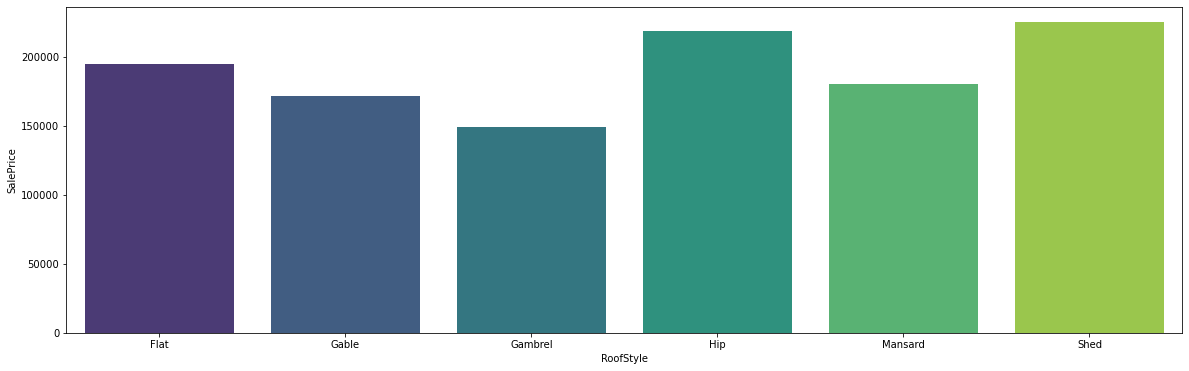

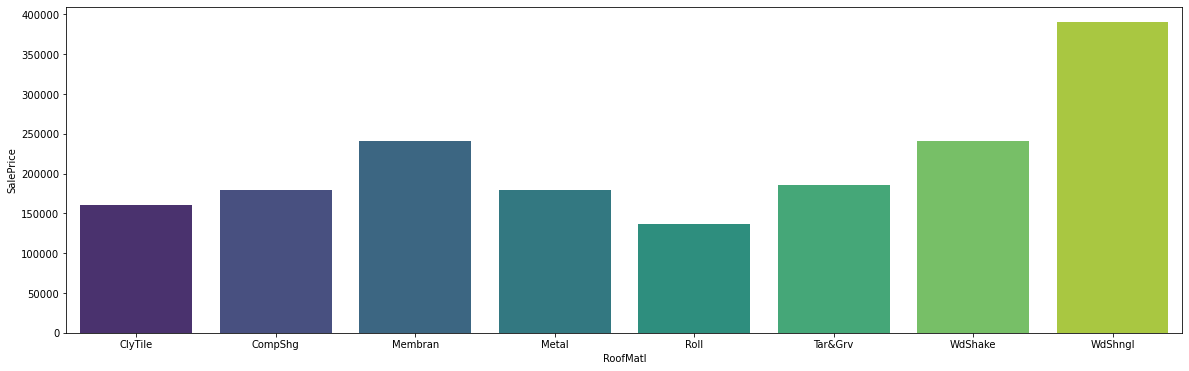

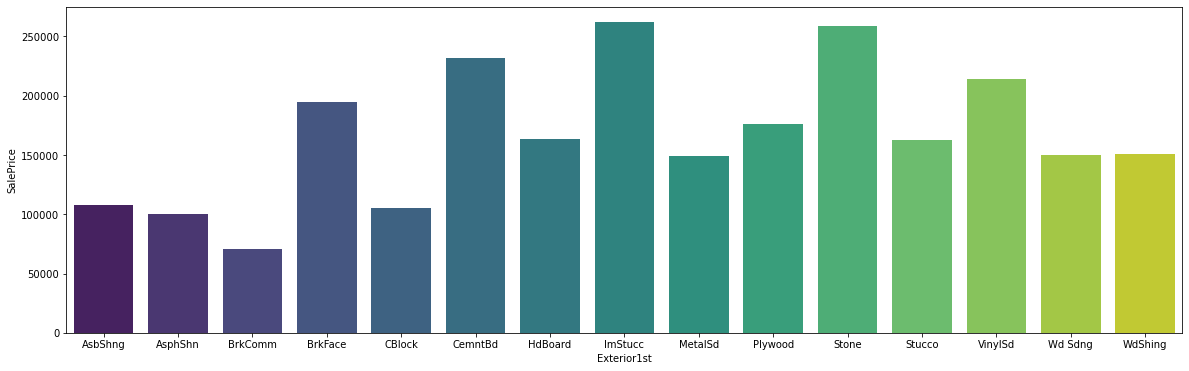

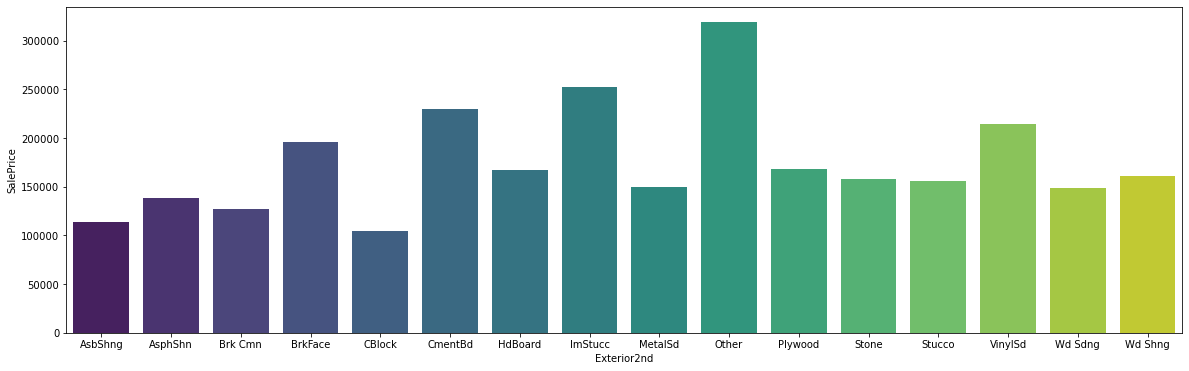

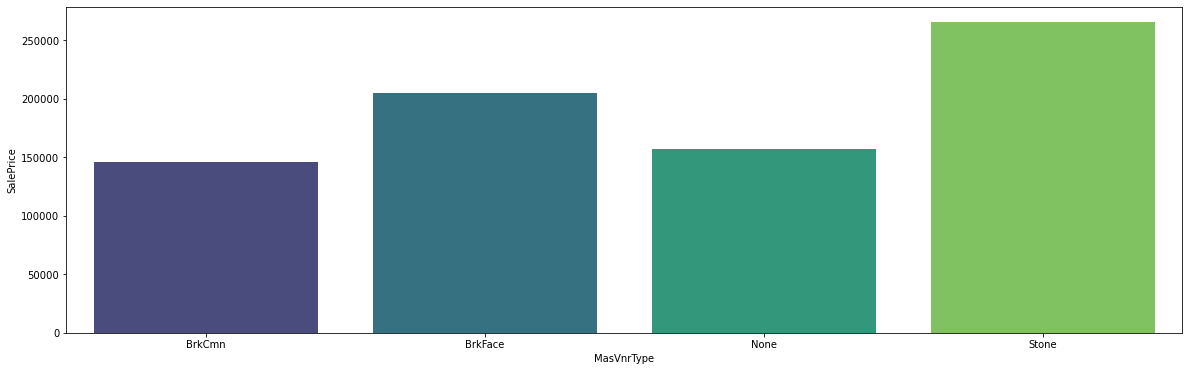

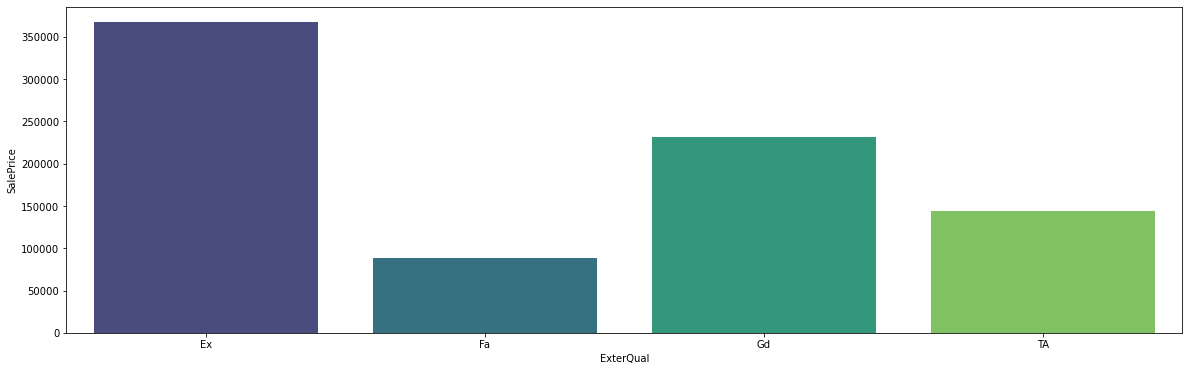

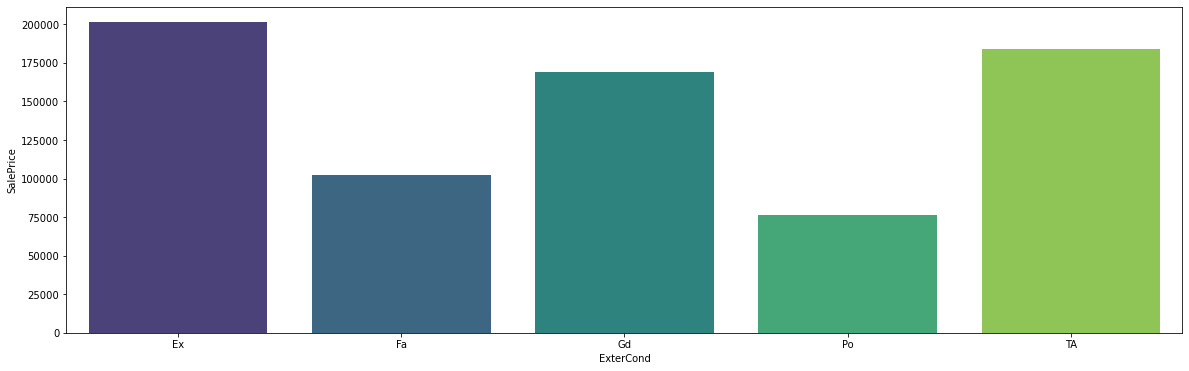

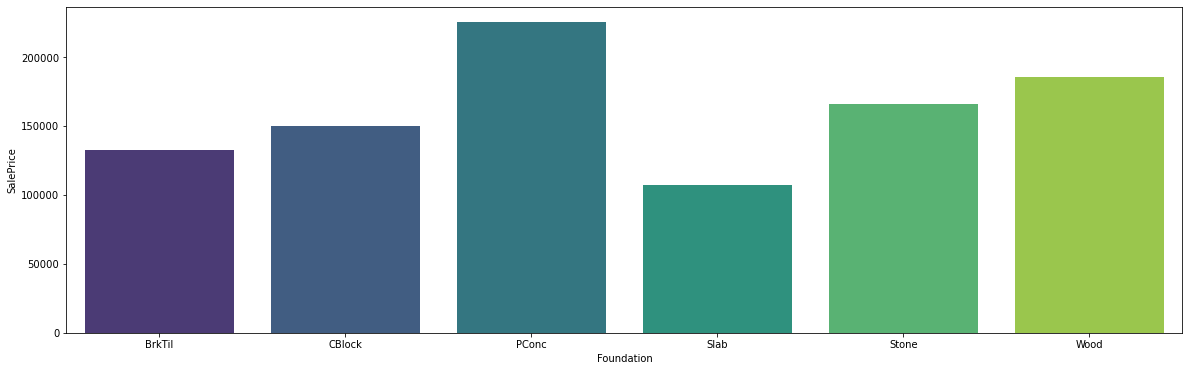

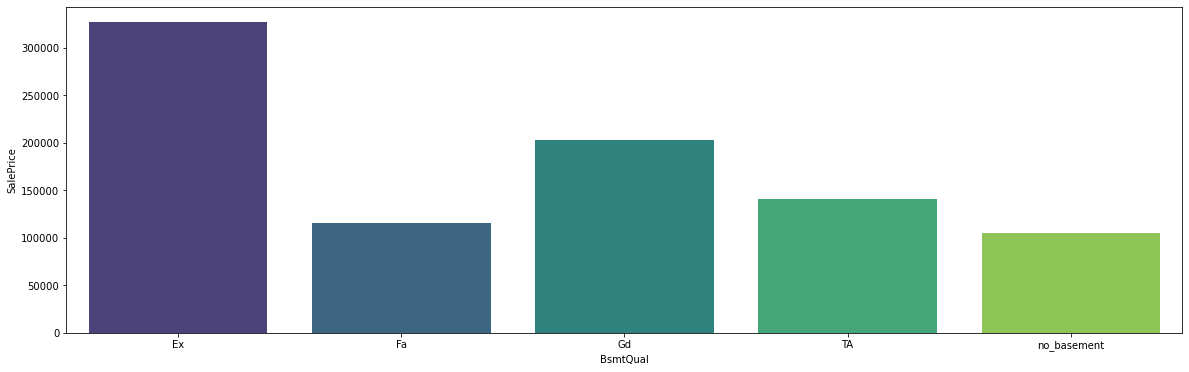

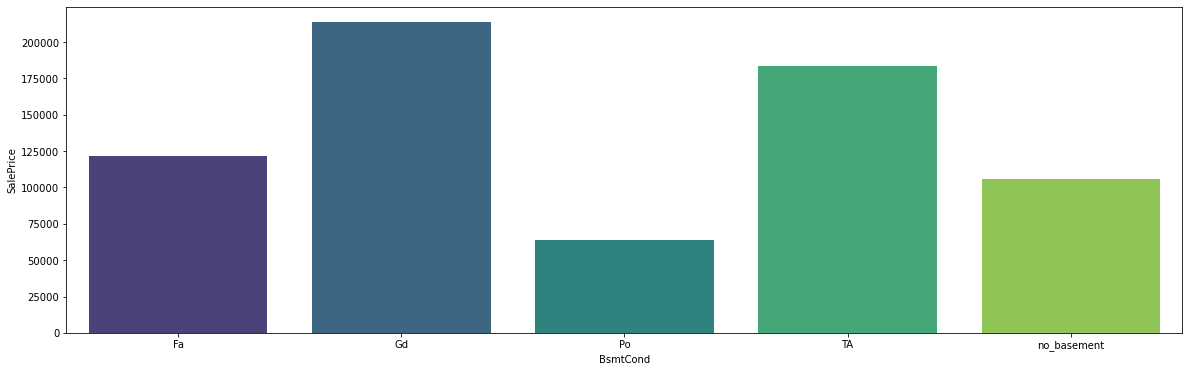

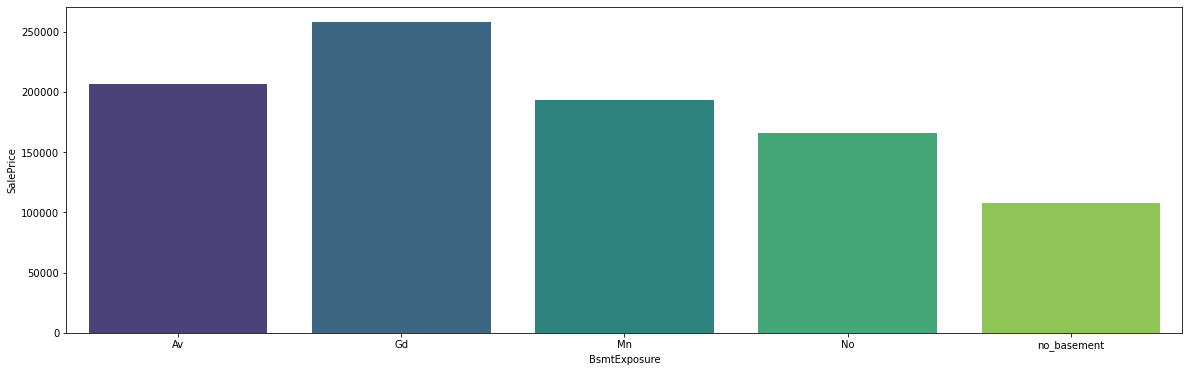

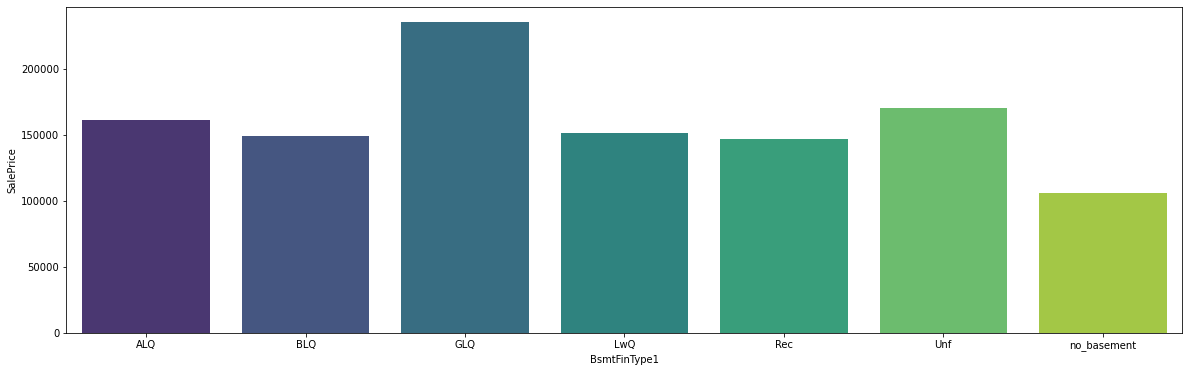

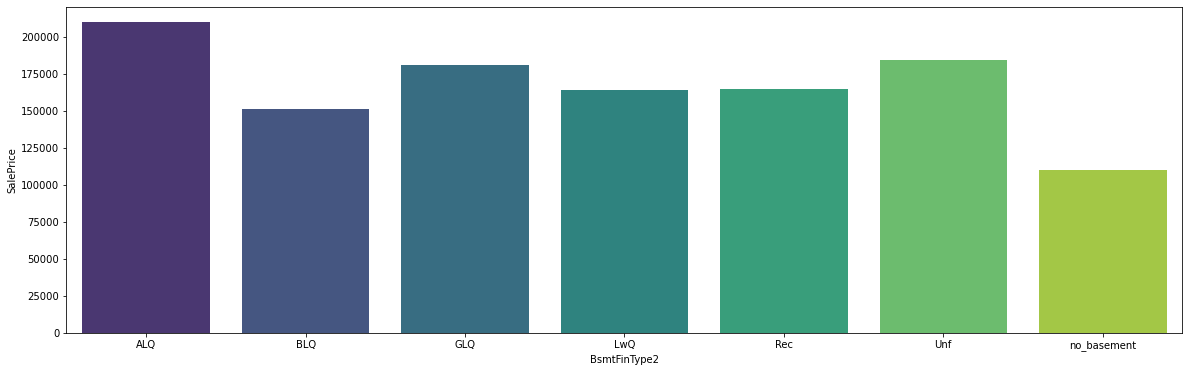

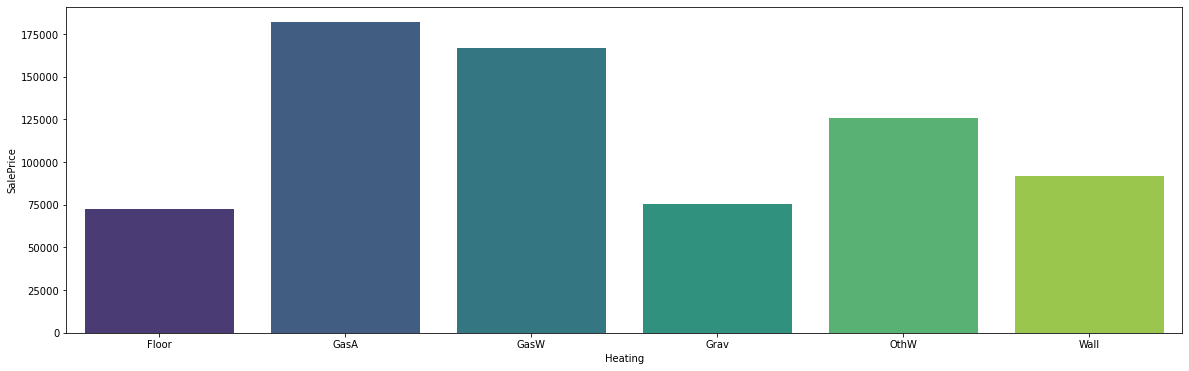

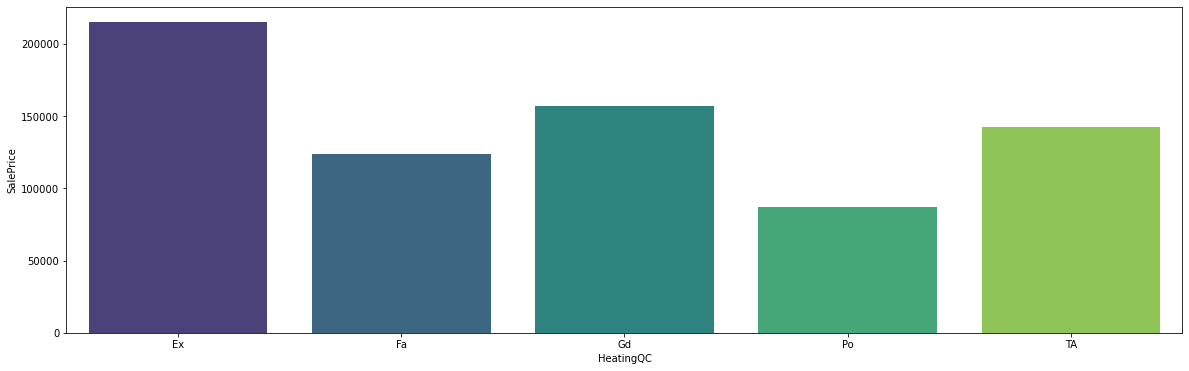

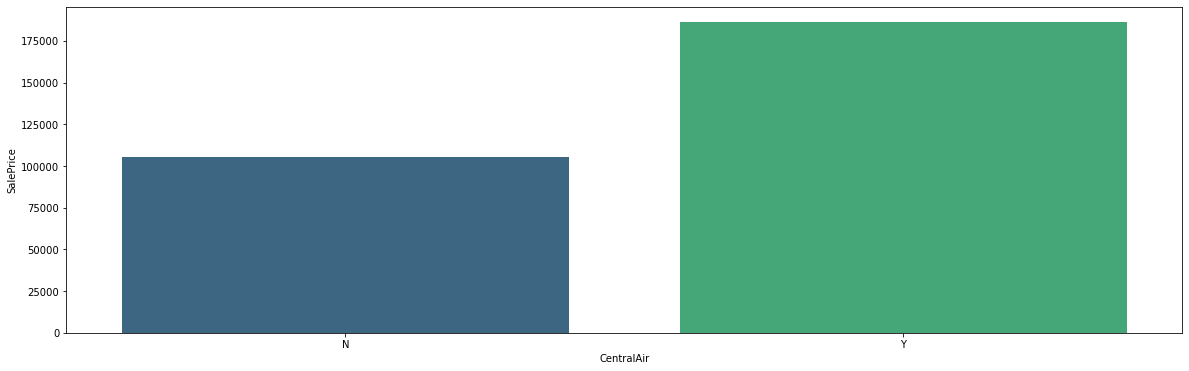

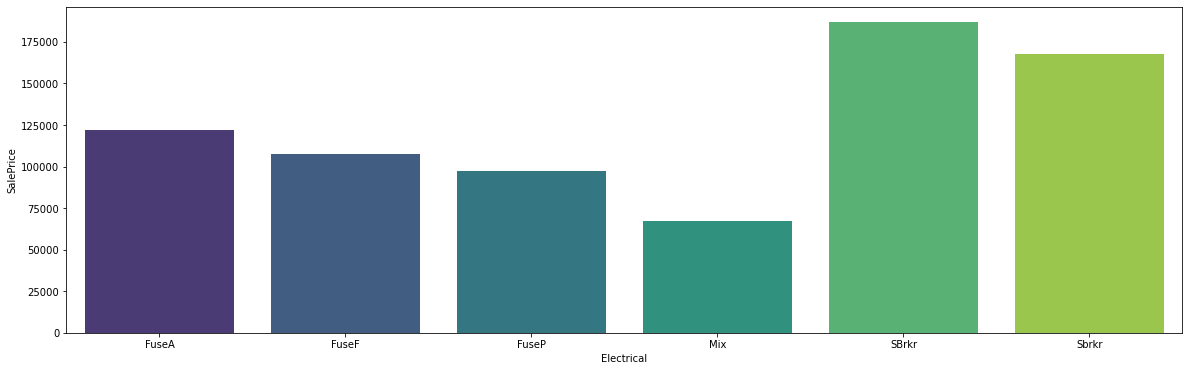

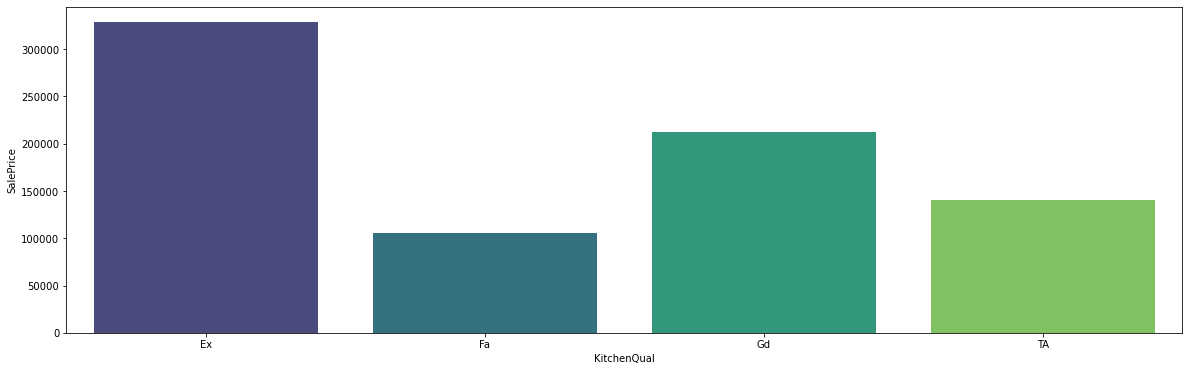

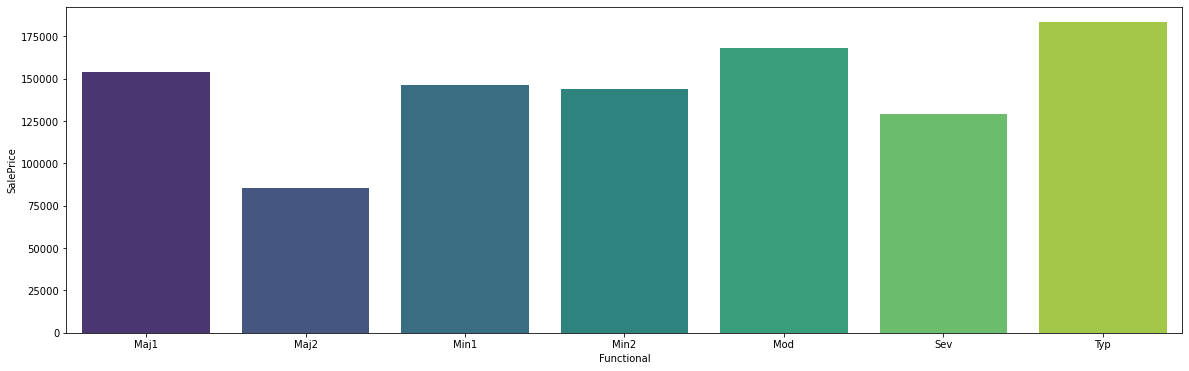

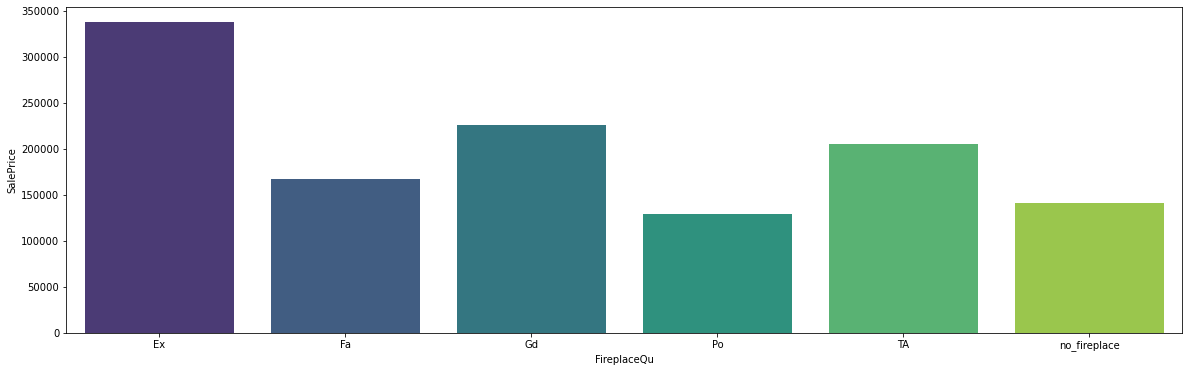

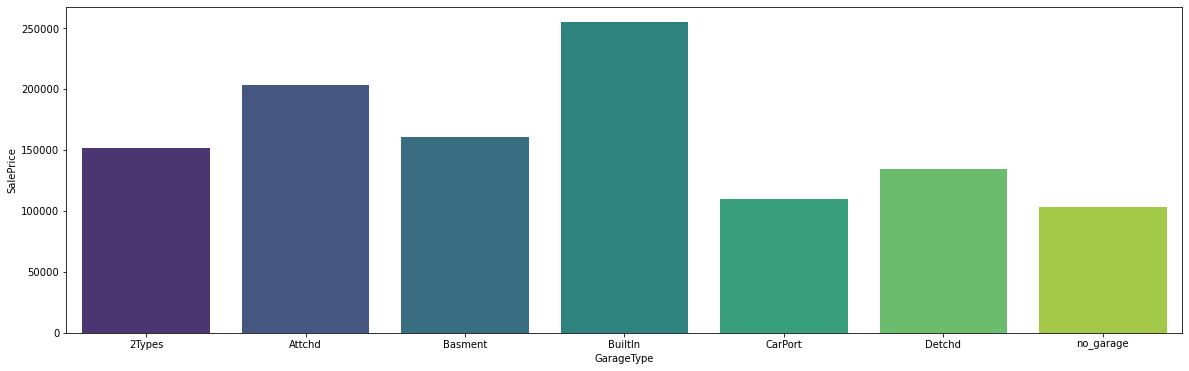

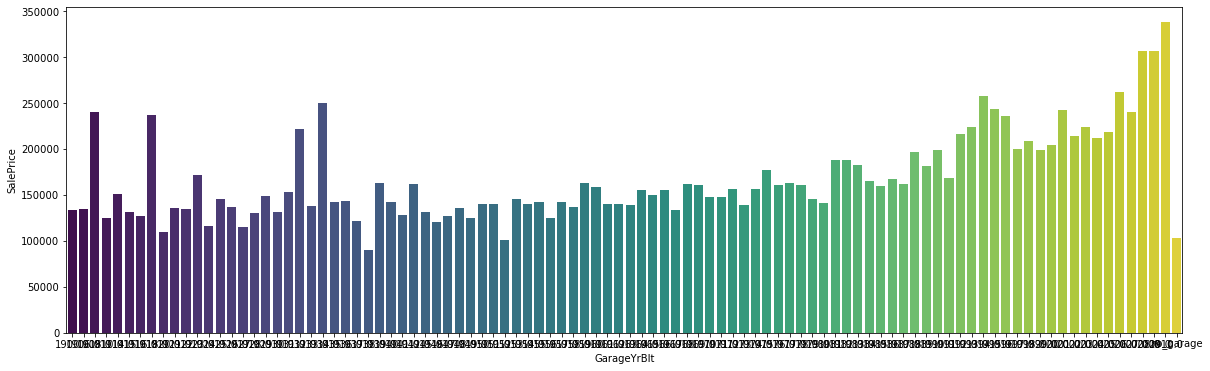

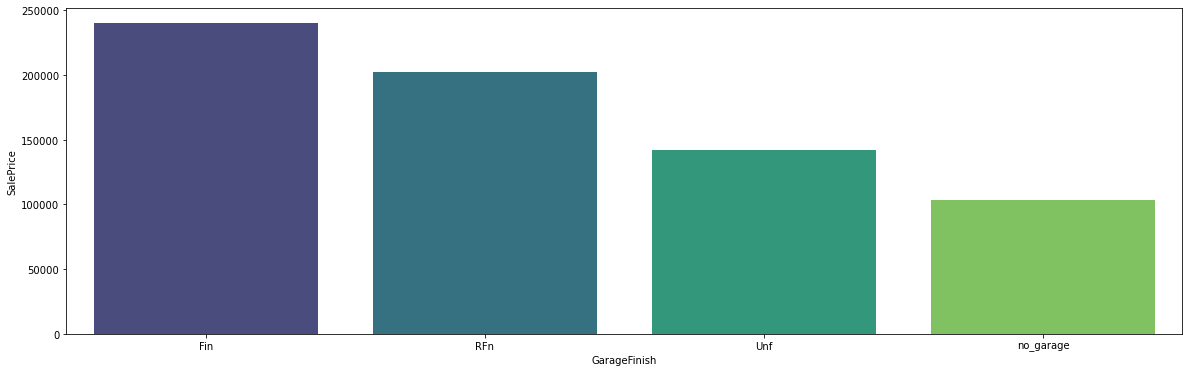

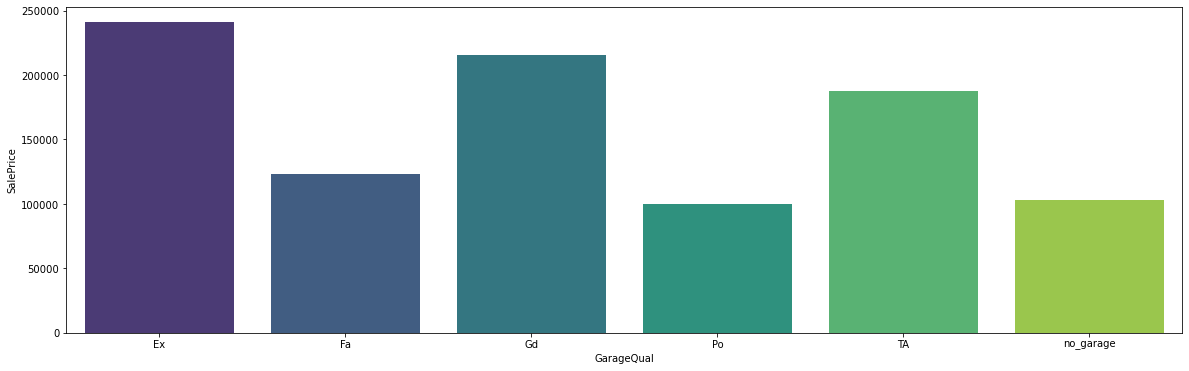

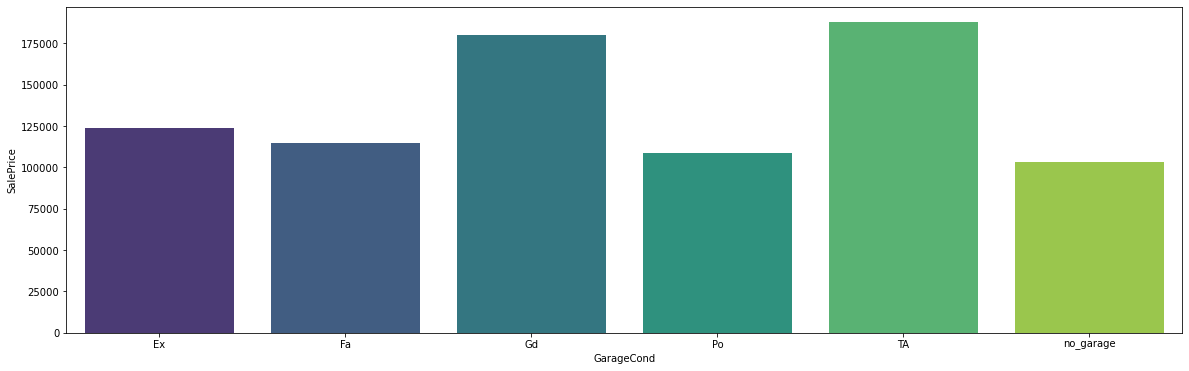

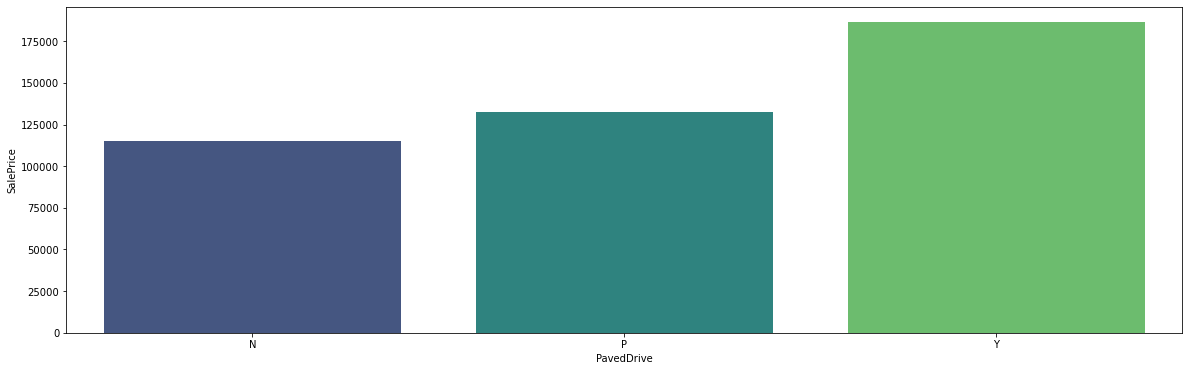

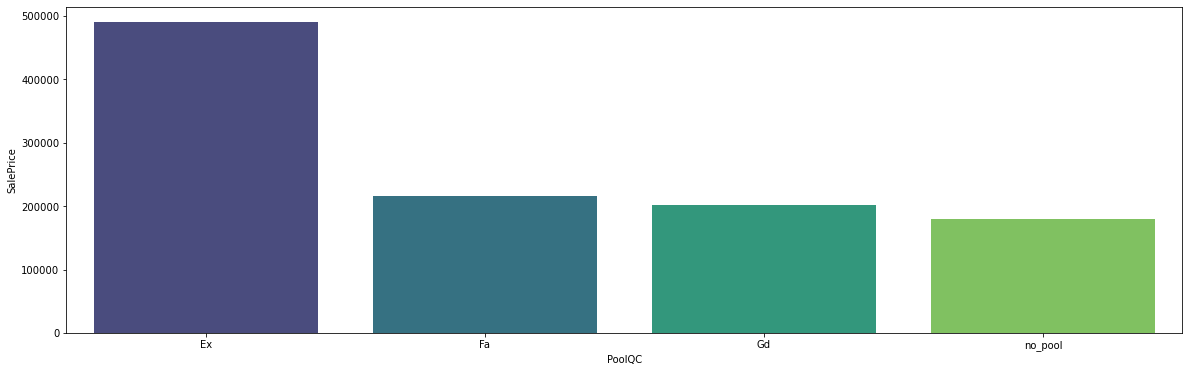

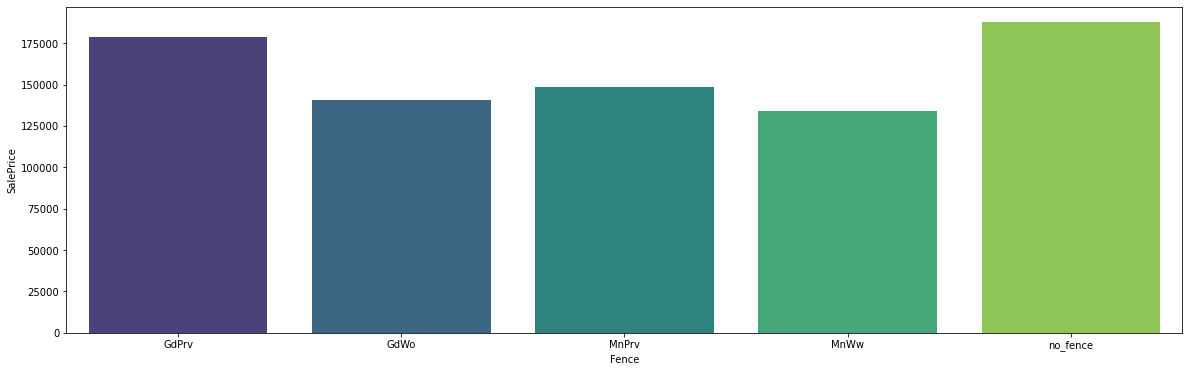

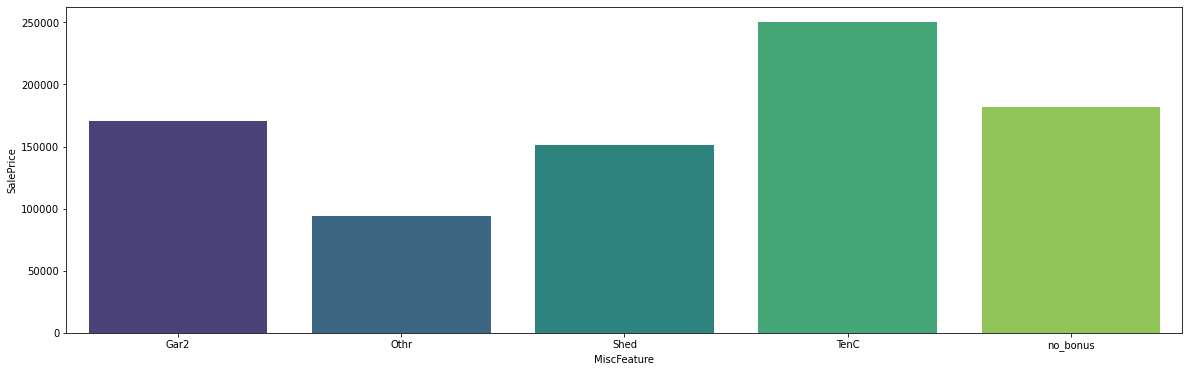

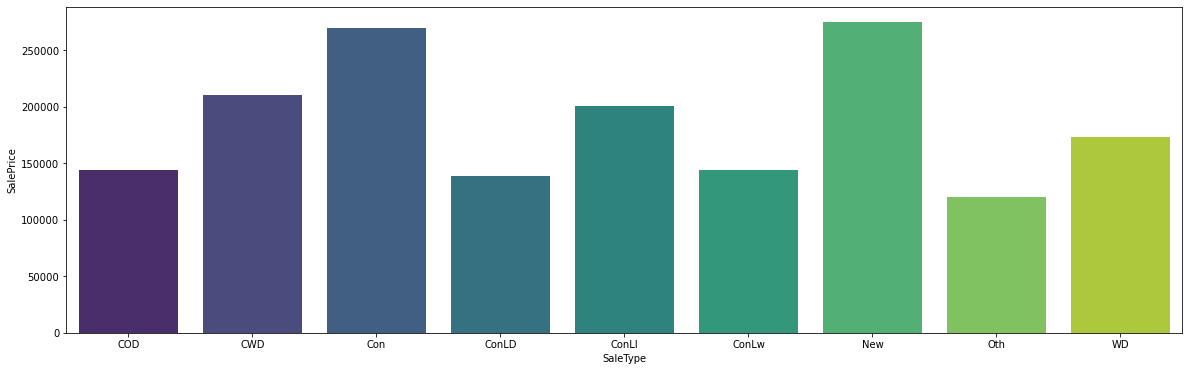

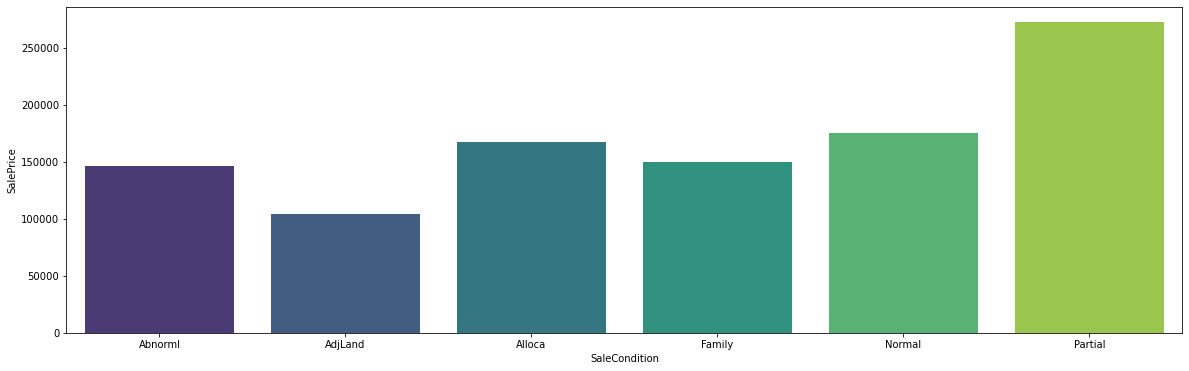

In [101]:
cols = house.select_dtypes(include = "object").columns
for col in cols:
    barpl(col)

I will do regression so I choose highest correlation *OverallQual- GrLivArea, GaragesCars, GarageArea,TotalBsmtSf, 1stFlrSF*

3- Build your initial model using these features and estimate the parameters using OLS.

In [108]:
from sklearn import linear_model
X = house[['OverallQual',"GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]]
Y = house.SalePrice

lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

print("Coefficents : {}".format(lrm.coef_))
print("\nIntercept : {}".format(lrm.intercept_))


import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

Coefficents : [2.39970394e+04 4.31228864e+01 1.45151932e+04 1.56639341e+01
 2.43907676e+01 1.11859135e+01]

Intercept : -102650.90069028965


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     775.0
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:51:46   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.027e+05   4903.994    -20.932      0.000   -1.12e+05    -9.3e+04
OverallQual    2.4e+04   1083.393     22.150      0.000    2.19e+04    2.61e+04
GrLivArea      43.1229      2.679     16.095      0.000      37.867      48.379
GarageCars   1.452e+04   3018.621      4.809      0.000    8593.872    2.04e+04
GarageArea     15.6639     10.475      1.495      0.135      -4.884      36.212
TotalBsmtSF    24.3908      4.318      5.649      0.000      15.921      32.860
1stFlrSF       11.1859      5.032      2.223      0.026       1.315      21.057
==============================================================================
Omnibus:                      431.781   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39208.253
Skew:                          -0.313   Prob(JB):                         0.00
Kurtosis:                      28.380   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""